In [1]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
from random import sample,seed
seed(12434)

default_cycler = cycler(linestyle=sample(['--', '-.'],2))
default_cycler = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

px = 1/plt.rcParams['figure.dpi'] 

## Read CSV

In [3]:

from glob import glob

fn = glob("../../../first_runs/cifar10-exp3/cifar10-exp3-buf500/*.csv")
print(fn)
df1 = pd.read_csv(fn[0])
fn = glob("../../../second_runs/cifar10-exp3/cifar10-exp3-buf500/*.csv")
print(fn)
df2 = pd.read_csv(fn[0])
fn = glob("../../../third_runs/cifar10-exp3/cifar10-exp3-buf500/*.csv")
print(fn)
df3 = pd.read_csv(fn[0])
fn = glob("../../../fourth_runs/cifar10-exp3/cifar10-exp3-buf500/*.csv")
print(fn)
df4 = pd.read_csv(fn[0])

['../../../first_runs/cifar10-exp3/cifar10-exp3-buf500/d25_m12_y2021_005924.csv']
['../../../second_runs/cifar10-exp3/cifar10-exp3-buf500/d11_m01_y2024_212211.csv']
['../../../third_runs/cifar10-exp3/cifar10-exp3-buf500/d17_m01_y2024_102801.csv']
['../../../fourth_runs/cifar10-exp3/cifar10-exp3-buf500/d19_m01_y2024_032016.csv']


In [4]:

all_methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "cont_conv", "drifta_conv", "2drifta_conv"]
lmethod     = ["\catf{}", "\conr[1]{}", "\conr[10]{}", "\conr[25]{}", "\conr[50]{}", "\driftadyn[50]{}", "\ddriftadyn[50]{}", "\conrconv", "\driftaconv", "\ddriftaconv"]

latex_method_name = {}

for k, method in enumerate(all_methods):
    latex_method_name[method]=lmethod[k]


methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta" "2drifta",
           "cont_conv", "drifta_conv", "2drifta_conv"]

# print(df1.columns)
# print(df2.columns)
# print(df3.columns)
# print(df4.columns)

## Compute number of training batches

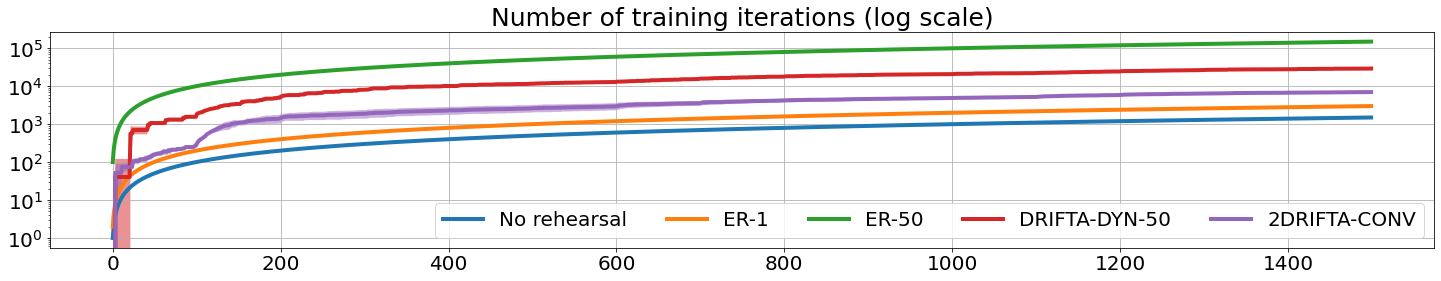

In [7]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in [ "catf", "conr1", "conr50", "drifta50",  "2drifta_conv",]:
            columns += ["train_batches_{}_{}_{}".format(method, opt, lr)]
            
            
train_batches=pd.concat(
    [ df1[columns].cumsum(), df2[columns].cumsum(), df3[columns].cumsum(), df4[columns].cumsum()], axis=1)


train_batches_mean = pd.DataFrame()
train_batches_stdev = pd.DataFrame()

for col in columns:
    train_batches_mean[col] = train_batches[col].mean(axis=1)
    train_batches_stdev[col] = train_batches[col].std(axis=1)

train_batches_mean.columns = [ col+"_mean" for col in columns]
train_batches_stdev.columns = [ col+"_stdev" for col in columns]
    
train_batches = pd.concat([train_batches_mean, train_batches_stdev], axis=1)  

name_map = {col:col.replace("train_batches_","").replace("_sgd_0.01","")
            .upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")
            .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
            

fig, ax = plt.subplots(1)
ax.ticklabel_format(useMathText=False)
for col in columns:
    
    nm = name_map[col]
    if nm == "CATF":
        nm = "No rehearsal"
    xf = train_batches[col+"_mean"].index
    yf = train_batches[col+"_mean"]
    dyf = train_batches[col+"_stdev"]
    
    train_batches[col+"_mean"].plot(figsize=(2000*px,400*px), logy=True, label=nm, alpha=1)
    ax_ = ax.fill_between( xf, yf.sub(dyf), yf.add(dyf),  alpha=0.5)



name_map["train_batches_catf_sgd_0.01"] = "No rehearsal"

plt.title('Number of training iterations (log scale)',fontsize=25, loc='center')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, ncol=5, loc='lower right')
plt.xticks(fontsize=20)
plt.savefig("cifar10-exp3-buf500-train-times.png")


## Plot average accuracy (on all tasks) per method

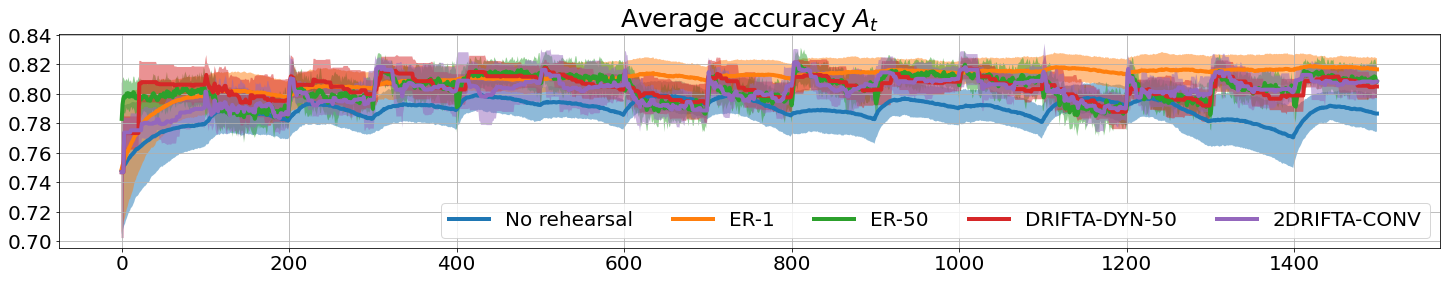

In [11]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in [ "catf", "conr1", "conr50", "drifta50",  "2drifta_conv",]:
            columns += ["acc_avg_{}_{}_{}".format(method, opt, lr)]


center=0
window=3000
name_map = {col:col.replace("acc_avg_","").replace("_sgd_0.01","")
            .upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")
            .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
            
avg_acc=pd.concat([ df1[columns], df2[columns], df3[columns], df4[columns] ], axis=1)


avg_acc_mean = pd.DataFrame()
avg_acc_stdev = pd.DataFrame()

for col in columns:
    avg_acc_mean[col] = avg_acc[col].mean(axis=1)
    avg_acc_stdev[col] = avg_acc[col].std(axis=1)


avg_acc_mean.columns = [ col+"_mean" for col in columns]
avg_acc_stdev.columns = [ col+"_stdev" for col in columns]
    
avg_acc = pd.concat([avg_acc_mean, avg_acc_stdev], axis=1)
avg_acc    

fig, ax = plt.subplots(1)
ax.ticklabel_format(useMathText=False)
for col in columns:
    
    nm = name_map[col]
    if nm == "CATF":
        nm = "No rehearsal"
    xf = avg_acc[col+"_mean"].index
    yf = avg_acc[col+"_mean"]
    dyf = avg_acc[col+"_stdev"]
    
    ax_ = ax.fill_between( xf, yf.sub(dyf), yf.add(dyf).clip(0,1),  alpha=0.5)   
    avg_acc[col+"_mean"].plot(figsize=(2000*px,400*px), label=nm, alpha=1)



name_map["acc_avg_catf_sgd_0.01"] = "No rehearsal"

plt.title('Average accuracy $A_t$',fontsize=25, loc='center')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, ncol=5, loc='lower right')
plt.xticks(fontsize=20)
plt.savefig("cifar10-exp3-buf500-avg-acc.png")

## Running accuracy (accuracy only on the current task)

In [ ]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]:
        for method in ["conr1", "conr50", "drifta50", "2drifta_conv"]:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, opt, lr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, opt, lr)
            columns += [column_name]
            df1[column_name] = df1.apply(mapper, axis=1)
            df2[column_name] = df2.apply(mapper, axis=1)
            df3[column_name] = df3.apply(mapper, axis=1)
            df4[column_name] = df4.apply(mapper, axis=1)

name_map = {col:col.replace("acc_run_","")
            .replace("_sgd_0.01","").upper()
            .replace("CONR","ER-")
            .replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}


run_acc=pd.concat([ df1[columns], df2[columns], df3[columns], df4[columns] ], axis=1)


run_acc_mean = pd.DataFrame()
run_acc_stdev = pd.DataFrame()

for col in columns:
    run_acc_mean[col] = run_acc[col].mean(axis=1)
    run_acc_stdev[col] = run_acc[col].std(axis=1)


run_acc_mean.columns = [ col+"_mean" for col in columns]
run_acc_stdev.columns = [ col+"_stdev" for col in columns]
    
run_acc = pd.concat([run_acc_mean, run_acc_stdev], axis=1)
run_acc    

fig, ax = plt.subplots(1)
ax.ticklabel_format(useMathText=False)
for col in columns:
    
    nm = name_map[col]
    if nm == "CATF":
        nm = "No rehearsal"
    xf = run_acc[col+"_mean"].index
    yf = run_acc[col+"_mean"]
    dyf = run_acc[col+"_stdev"]
    
    ax_ = ax.fill_between( xf, yf.sub(dyf), yf.add(dyf).clip(0,1),  alpha=0.5)   
    run_acc[col+"_mean"].plot(figsize=(2000*px,400*px), label=nm, alpha=1)



name_map["acc_run_catf_sgd_0.01"] = "No rehearsal"

plt.title('Current task accuracy $C

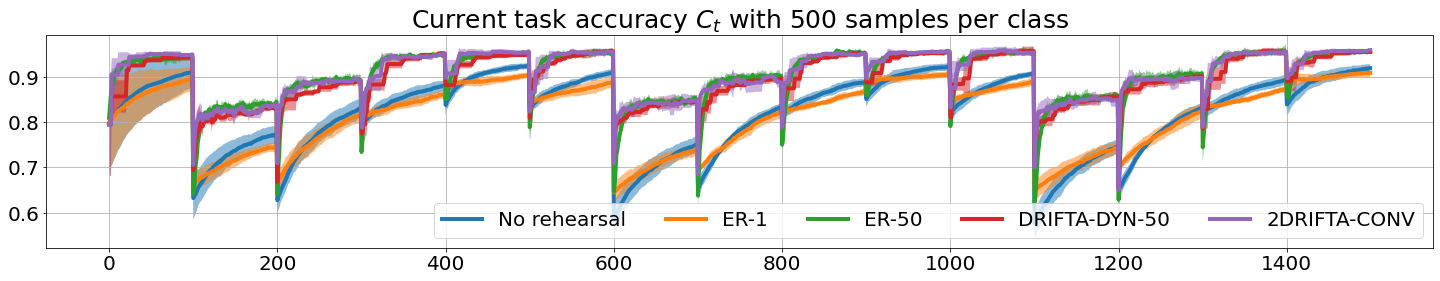

In [16]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]:
        for method in ["catf","conr1", "conr50", "drifta50", "2drifta_conv"]:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, opt, lr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, opt, lr)
            columns += [column_name]
            df1[column_name] = df1.apply(mapper, axis=1)
            df2[column_name] = df2.apply(mapper, axis=1)
            df3[column_name] = df3.apply(mapper, axis=1)
            df4[column_name] = df4.apply(mapper, axis=1)

name_map = {col:col.replace("acc_run_","")
            .replace("_sgd_0.01","").upper()
            .replace("CONR","ER-")
            .replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}


run_acc=pd.concat([ df1[columns], df2[columns], df3[columns], df4[columns] ], axis=1)


run_acc_mean = pd.DataFrame()
run_acc_stdev = pd.DataFrame()

for col in columns:
    run_acc_mean[col] = run_acc[col].mean(axis=1)
    run_acc_stdev[col] = run_acc[col].std(axis=1)


run_acc_mean.columns = [ col+"_mean" for col in columns]
run_acc_stdev.columns = [ col+"_stdev" for col in columns]
    
run_acc = pd.concat([run_acc_mean, run_acc_stdev], axis=1)
run_acc    

fig, ax = plt.subplots(1)
ax.ticklabel_format(useMathText=False)
for col in columns:
    
    nm = name_map[col]
    if nm == "CATF":
        nm = "No rehearsal"
    xf = run_acc[col+"_mean"].index
    yf = run_acc[col+"_mean"]
    dyf = run_acc[col+"_stdev"]
    
    ax_ = ax.fill_between( xf, yf.sub(dyf), yf.add(dyf).clip(0,1),  alpha=0.5)   
    run_acc[col+"_mean"].plot(figsize=(2000*px,400*px), label=nm, alpha=1)



name_map["acc_run_catf_sgd_0.01"] = "No rehearsal"

plt.title('Current task accuracy $C_t$ with 500 samples per class',fontsize=25, loc='center')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, ncol=5, loc='lower right')
plt.xticks(fontsize=20)
plt.savefig("cifar10-exp3-buf500-run-acc.png")

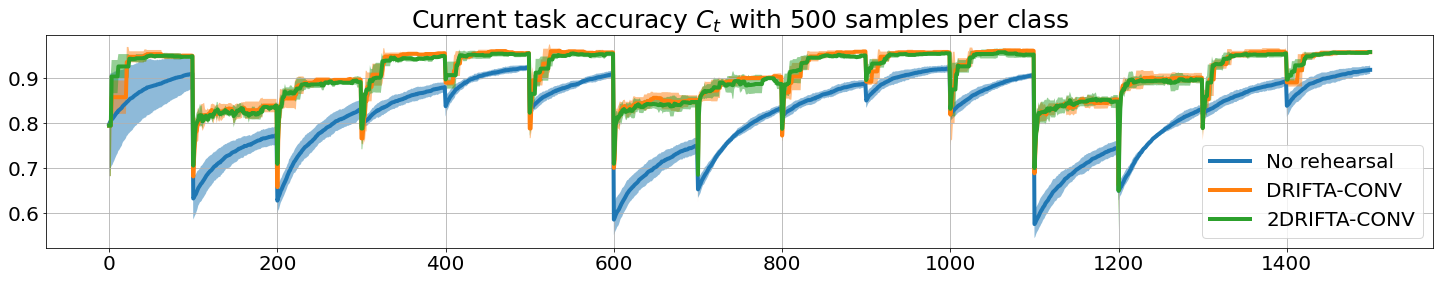

In [17]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]:
        for method in ["catf", "drifta_conv", "2drifta_conv"]:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, opt, lr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, opt, lr)
            columns += [column_name]
            df1[column_name] = df1.apply(mapper, axis=1)
            df2[column_name] = df2.apply(mapper, axis=1)
            df3[column_name] = df3.apply(mapper, axis=1)
            df4[column_name] = df4.apply(mapper, axis=1)

name_map = {col:col.replace("acc_run_","")
            .replace("_sgd_0.01","").upper()
            .replace("CONR","ER-")
            .replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}


run_acc=pd.concat([ df1[columns], df2[columns], df3[columns], df4[columns] ], axis=1)


run_acc_mean = pd.DataFrame()
run_acc_stdev = pd.DataFrame()

for col in columns:
    run_acc_mean[col] = run_acc[col].mean(axis=1)
    run_acc_stdev[col] = run_acc[col].std(axis=1)


run_acc_mean.columns = [ col+"_mean" for col in columns]
run_acc_stdev.columns = [ col+"_stdev" for col in columns]
    
run_acc = pd.concat([run_acc_mean, run_acc_stdev], axis=1)
run_acc    

fig, ax = plt.subplots(1)
ax.ticklabel_format(useMathText=False)
for col in columns:
    
    nm = name_map[col]
    if nm == "CATF":
        nm = "No rehearsal"
    xf = run_acc[col+"_mean"].index
    yf = run_acc[col+"_mean"]
    dyf = run_acc[col+"_stdev"]
    
    ax_ = ax.fill_between( xf, yf.sub(dyf), yf.add(dyf).clip(0,1),  alpha=0.5)   
    run_acc[col+"_mean"].plot(figsize=(2000*px,400*px), label=nm, alpha=1)



name_map["acc_run_catf_sgd_0.01"] = "No rehearsal"

plt.title('Current task accuracy $C_t$ with 500 samples per class',fontsize=25, loc='center')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, ncol=1, loc='lower right')
plt.xticks(fontsize=20)
plt.savefig("abl-cifar10-exp3-buf500-run-acc.png")

# Online Accuracy

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

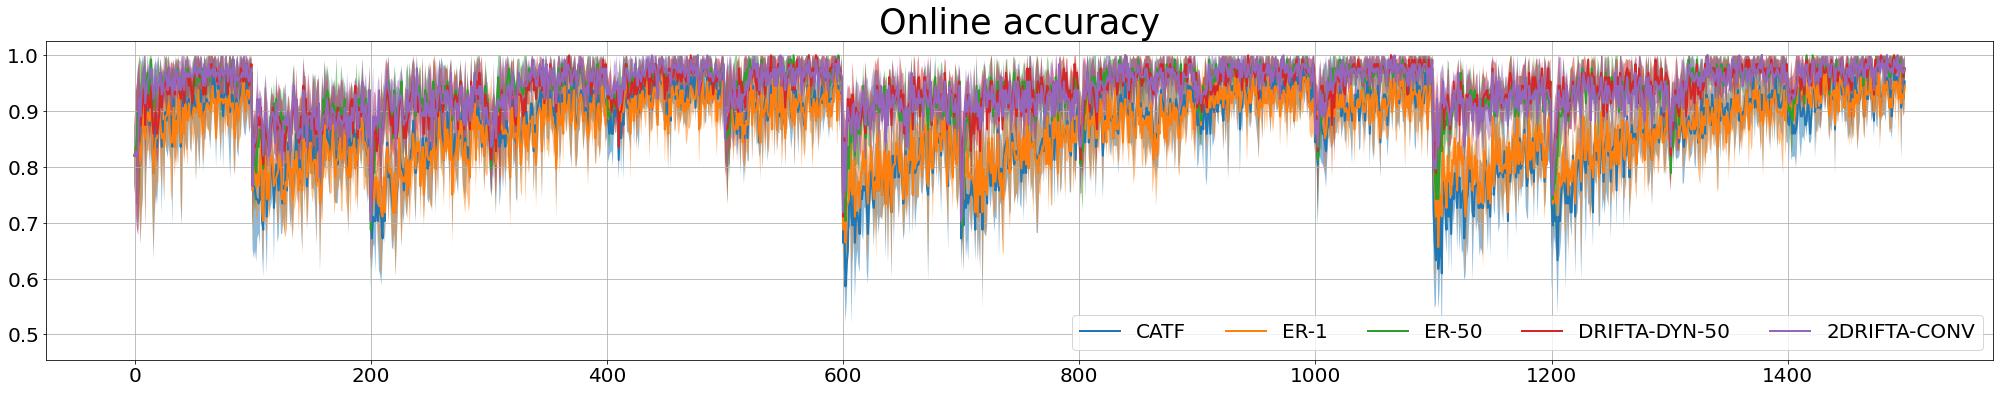

In [27]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in ["catf", "conr1", "conr50", "drifta50", "2drifta_conv",]:
            columns += ["online_acc_{}_{}_{}".format(method, opt, lr)]  

        
name_map = {col:col.replace("online_acc_","")
            .replace("_sgd_0.01","").upper().replace("CONR","ER-")
            .replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

online_acc=pd.concat([ df1[columns], df2[columns], df3[columns], df4[columns] ], axis=1)


online_acc_mean = pd.DataFrame()
online_acc_stdev = pd.DataFrame()

for col in columns:
    online_acc_mean[col] = online_acc[col].mean(axis=1)
    online_acc_stdev[col] = online_acc[col].std(axis=1)


online_acc_mean.columns = [ col+"_mean" for col in columns]
online_acc_stdev.columns = [ col+"_stdev" for col in columns]
    
online_acc = pd.concat([online_acc_mean, online_acc_stdev], axis=1)
    
fig, ax = plt.subplots(1)
ax.ticklabel_format(useMathText=False)
for col in columns:
    
    nm = name_map[col]
    xf = online_acc[col+"_mean"].index
    yf = online_acc[col+"_mean"]
    dyf = online_acc[col+"_stdev"]
    
    ax_ = ax.fill_between( xf, yf.sub(dyf), yf.add(dyf).clip(0,1),  alpha=0.5)   
    online_acc[col+"_mean"].plot(figsize=(2000*px,400*px), label=nm, linewidth=2, alpha=1)



name_map["online_acc_catf_sgd_0.01"] = "No rehearsal"

plt.title('Online accuracy',fontsize=35, loc='center')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, ncol=5, loc='lower right')
plt.xticks(fontsize=20)
# plt.savefig("cifar10-exp3-buf500-online-acc.png")


## Create tables

In [28]:
metrics = {}
_stats  = ["train_batches", "acc_avg", "acc_run", "online_acc"]

lstats = [\
          "$N_{t}$", "$\\bar{A}$",  \
          "$\\bar{A}_{0-500}$",  \
          "$\\bar{A}_{1000-1500}$",  \
          "$\\bar{C}_{t}$",  \
          "$\\bar{C}_{0-500}$",  \
          "$\\bar{C}_{1000-1500}$",  \
          "$\\bar{O}_{t}$"]

LATEX_STATS = {s:ls for s,ls in zip(_stats,lstats)}

stats  = ["train_batches", "acc_avg", "acc_run", "online_acc"]

methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "drifta_conv",  "2drifta_conv"]

# ################################################################################
columns = []
for method in methods:
    columns += ["train_batches_{}_sgd_0.01".format(method)]

train_batches=pd.concat(
    [ df1[columns].sum(), df2[columns].sum(), df3[columns].sum(), df4[columns].sum()])

by_row_index = train_batches.groupby(train_batches.index, sort=False)


train_batches_mean = by_row_index.mean()
train_batches_stdev = by_row_index.std()

name_map = {col:col.replace("train_batches_","").replace("_sgd_0.01","")
            .upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")
            .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}

train_batches=pd.concat([ train_batches_mean, train_batches_stdev], axis=1).round()
train_batches.index = [name_map[ind] for ind in train_batches.index]
# print(tabulate( train_batches, headers=["methods", "Nt_mean", "Nt_stdev"], tablefmt='rst'))

# ################################################################################

# ################################################################################
columns = []
for method in methods:
    columns += ["acc_avg_{}_sgd_0.01".format(method)]

avg_acc=pd.concat([ df1[columns].mean(), df2[columns].mean(), df3[columns].mean(), df4[columns].mean()])

by_row_index = avg_acc.groupby(avg_acc.index, sort=False)

avg_acc_mean = by_row_index.mean()
avg_acc_stdev = by_row_index.std()

name_map.update({col:col.replace("acc_avg_","").replace("_sgd_0.01","")
            .upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")
            .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns})


avg_acc=pd.concat([ avg_acc_mean, avg_acc_stdev], axis=1)
avg_acc.index = [name_map[ind] for ind in avg_acc.index]
# print(tabulate( avg_acc, headers=["methods", "At_mean", "At_stdev"], tablefmt='rst'))

# ################################################################################

# ################################################################################
columns = []
for method in methods:
    mapper = lambda row: row['acc_{}_sgd_0.01_T{}'.format(method, int(row['task']))]
    column_name = 'acc_run_{}_sgd_0.01'.format(method)
    columns += [column_name]
    df1[column_name] = df1.apply(mapper, axis=1)
    df2[column_name] = df2.apply(mapper, axis=1)
    df3[column_name] = df3.apply(mapper, axis=1)
    df4[column_name] = df4.apply(mapper, axis=1)

run_acc=pd.concat([ df1[columns].mean(), df2[columns].mean(), df3[columns].mean(), df4[columns].mean()])

by_row_index = run_acc.groupby(run_acc.index, sort=False)

run_acc_mean = by_row_index.mean()
run_acc_stdev = by_row_index.std()

name_map.update({col:col.replace("acc_run_","").replace("_sgd_0.01","")
            .upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")
            .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns})


run_acc=pd.concat([ run_acc_mean, run_acc_stdev], axis=1)
run_acc.index = [name_map[ind] for ind in run_acc.index]
# print(tabulate( run_acc, headers=["methods", "Ct_mean", "Ct_stdev"], tablefmt='rst'))

# ################################################################################

# ################################################################################
columns = []
for method in methods:
    columns += ["online_acc_{}_sgd_0.01".format(method)]

online_acc=pd.concat([ df1[columns].mean(), df2[columns].mean(), df3[columns].mean(), df4[columns].mean()])

by_row_index = online_acc.groupby(online_acc.index, sort=False)

online_acc_mean = by_row_index.mean()
online_acc_stdev = by_row_index.std()

name_map.update({col:col.replace("online_acc_","").replace("_sgd_0.01","")
            .upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-")
            .replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns})


online_acc=pd.concat([ online_acc_mean, online_acc_stdev], axis=1)
online_acc.index = [name_map[ind] for ind in online_acc.index]
# print(tabulate( online_acc, headers=["methods", "Ot_mean", "Ot_stdev"], tablefmt='rst'))

# ################################################################################

percent_of_run = train_batches/150000

train_batches= train_batches.astype(int).astype(str) 
train_batches = train_batches[train_batches.columns].agg(' \\textpm '.join, axis=1)

percent_of_run= percent_of_run.round(3).astype(str) 
percent_of_run = percent_of_run[percent_of_run.columns].agg(' \\textpm '.join, axis=1)

avg_acc= avg_acc.round(3).astype(str) 
avg_acc = avg_acc[avg_acc.columns].agg(' \\textpm '.join, axis=1)

run_acc= run_acc.round(3).astype(str) 
run_acc = run_acc[run_acc.columns].agg(' \\textpm '.join, axis=1)

online_acc= online_acc.round(3).astype(str) 
online_acc = online_acc[online_acc.columns].agg(' \\textpm '.join, axis=1)

all_stats = pd.concat([percent_of_run, train_batches, avg_acc, run_acc, online_acc], axis=1)

lmethods = ["\catf{}",  "\erv[1]{}", "\erv[10]{}",  "\erv[25]{}", "\erv[50]{}", "\driftadyn[50]{}", "\ddriftadyn[50]{}", "\driftaconv", "\driftaconv"]

methods = ['CATF', 'ER-1', 'ER-10', 'ER-25', 'ER-50', 'DRIFTA-DYN-50', '2DRIFTA-DYN-50', 'DRIFTA-CONV', '2DRIFTA-CONV']
methods_dict = {m:lm for m, lm in zip(methods, lmethods)}

all_stats.index = [methods_dict[M] for M in all_stats.index]

header = ["methods", "$N_{t}$", "$\\bar{A}$", "$\\bar{C}_{t}$", "$\\bar{O}_{t}$"]
print(tabulate( all_stats, headers=header, tablefmt="latex_raw"))

=================  ===================  ==================  ===================  ===================  ===================
..                 methods              $N_{t}$             $\bar{A}$            $\bar{C}_{t}$        $\bar{O}_{t}$
=================  ===================  ==================  ===================  ===================  ===================
\catf{}            0.01 \textpm 0.0     1500 \textpm 0      0.789 \textpm 0.013  0.82 \textpm 0.012   0.866 \textpm 0.007
\erv[1]{}          0.02 \textpm 0.0     3000 \textpm 0      0.81 \textpm 0.011   0.816 \textpm 0.013  0.868 \textpm 0.007
\erv[10]{}         0.2 \textpm 0.0      30000 \textpm 0     0.806 \textpm 0.009  0.89 \textpm 0.006   0.925 \textpm 0.003
\erv[25]{}         0.5 \textpm 0.0      75000 \textpm 0     0.805 \textpm 0.01   0.902 \textpm 0.005  0.936 \textpm 0.002
\erv[50]{}         1.0 \textpm 0.0      150000 \textpm 0    0.803 \textpm 0.01   0.905 \textpm 0.006  0.939 \textpm 0.003
\driftadyn[50]{}   0.195 \text